In [6]:
pip install pandas numpy scikit-learn matplotlib seaborn tensorflow keras

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   -------- ------------------------------ 72.6/332.0 MB 945.3 kB/s eta 0:04:35
   -------- ------------------------------ 72.9/332.0 MB 947.2 kB/s eta 0:04:34
   -------- ------------------------------ 72.9/332.0 MB 947.2 kB/s eta 0:04:34
   -------- ------------------------------ 73.1/332.0 MB 942.0 kB/s eta 0:04:35
   -------- ------------------------------ 73.1/332.0 MB 942.0 kB/s eta 0:04:35
   -------- ------------------------------ 73.1/332.0 MB 942.0 kB/s eta 0:04:35
   -------- ------------------------------ 73.7/332.0 MB 944.4 kB/s eta 0:04:34
   -------- ------------------------------ 74.2/332.0 MB 950.9 kB/s eta 0:04:32
   -------- ------------------------------ 74.2/332.0 MB 950.9 kB/s eta 0:04:32
   -------- ------------------------------ 74.4/332.0 MB 956.9 kB/s eta 0:04:30
   -------- ------------------------------ 74.4/332.0 MB 956.9 kB/s eta 0:04:30
   -------- ------------------------------ 74.7/332.0 MB 954.6 kB/s eta 0:04:30
   -------- ---------------------------

In [5]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 656.0 kB/s eta 0:01:26
   ---------------------------------------- 0.5/56.8 MB 656.0 kB/s eta 0:01:26
    --------------------------------------- 0.8/56.8 MB 733.1 kB/s eta 0:01:17
    --------------------------------------- 1.0/56.8 MB 757.3 kB/s eta 0:01:14
    --------------------------------------- 1.0/56.8 MB 757.3 kB/s eta 0:01:14
    --------------------------------------- 1.3/56.8 MB 718.5 kB/s eta 0:01:18
    ----------------------------

# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load the Dataset

In [20]:
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
pima=pd.read_csv('D:\Phan_Tich_Du_Lieu_2025\lesson3\pima-indians-diabetes.data.csv',names=column_names)

# Initial Data Overview

In [11]:
print (pima.head().to_string(index=False))

 6  148  72  35   0  33.6  0.627  50  1
 1   85  66  29   0  26.6  0.351  31  0
 8  183  64   0   0  23.3  0.672  32  1
 1   89  66  23  94  28.1  0.167  21  0
 0  137  40  35 168  43.1  2.288  33  1
 5  116  74   0   0  25.6  0.201  30  0


In [12]:
print(pima.describe())

                6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   32.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.500000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

            0.627          50           1  
count  767.000000  767.000000  767.000000  
mean     0.471674   33.219035    0.348110  
std      0.331497   11.752296    0.476682  
min      0.078000   21.000000    0.000000  
25%      0.243500   24.000000    0.000000  
50%   

In [13]:
print(pima.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


# Format Data For Better Readability

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [15]:
print (pima.head().to_string(index=False))

 6  148  72  35   0  33.6  0.627  50  1
 1   85  66  29   0 26.60   0.35  31  0
 8  183  64   0   0 23.30   0.67  32  1
 1   89  66  23  94 28.10   0.17  21  0
 0  137  40  35 168 43.10   2.29  33  1
 5  116  74   0   0 25.60   0.20  30  0


In [16]:
print(pima.describe().to_string(index=False))

     6    148     72     35      0   33.6  0.627     50      1
767.00 767.00 767.00 767.00 767.00 767.00 767.00 767.00 767.00
  3.84 120.86  69.10  20.52  79.90  31.99   0.47  33.22   0.35
  3.37  31.98  19.37  15.95 115.28   7.89   0.33  11.75   0.48
  0.00   0.00   0.00   0.00   0.00   0.00   0.08  21.00   0.00
  1.00  99.00  62.00   0.00   0.00  27.30   0.24  24.00   0.00
  3.00 117.00  72.00  23.00  32.00  32.00   0.37  29.00   0.00
  6.00 140.00  80.00  32.00 127.50  36.60   0.62  41.00   1.00
 17.00 199.00 122.00  99.00 846.00  67.10   2.42  81.00   1.00


# Check For Missing or Invalid Data

In [17]:
print(pima.isnull().sum().to_string(index=False))

0
0
0
0
0
0
0
0
0


# Check for zero values

In [18]:
zero_values = pima.apply(lambda col : (col == 0).sum()) 
print (zero_values)

6        111
148        5
72        35
35       227
0        373
33.6      11
0.627      0
50         0
1        500
dtype: int64


# Replace Zeroes With Median (where 0 is invalid)

In [21]:
columns_to_replace = ['Glucose' , 'SkinThickness' , 'BloodPressure' , 'BMI' , 'Insulin']
for column in columns_to_replace:
    median_value = pima[column].median()
    pima[column]= pima[column].replace(0, median_value)

# Recheck for 0 values

In [22]:
zero_values = pima.apply (lambda col :(col == 0).sum())
print ("Zero Values after replacement")
print (zero_values)

Zero Values after replacement
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


# Histogram Distribution

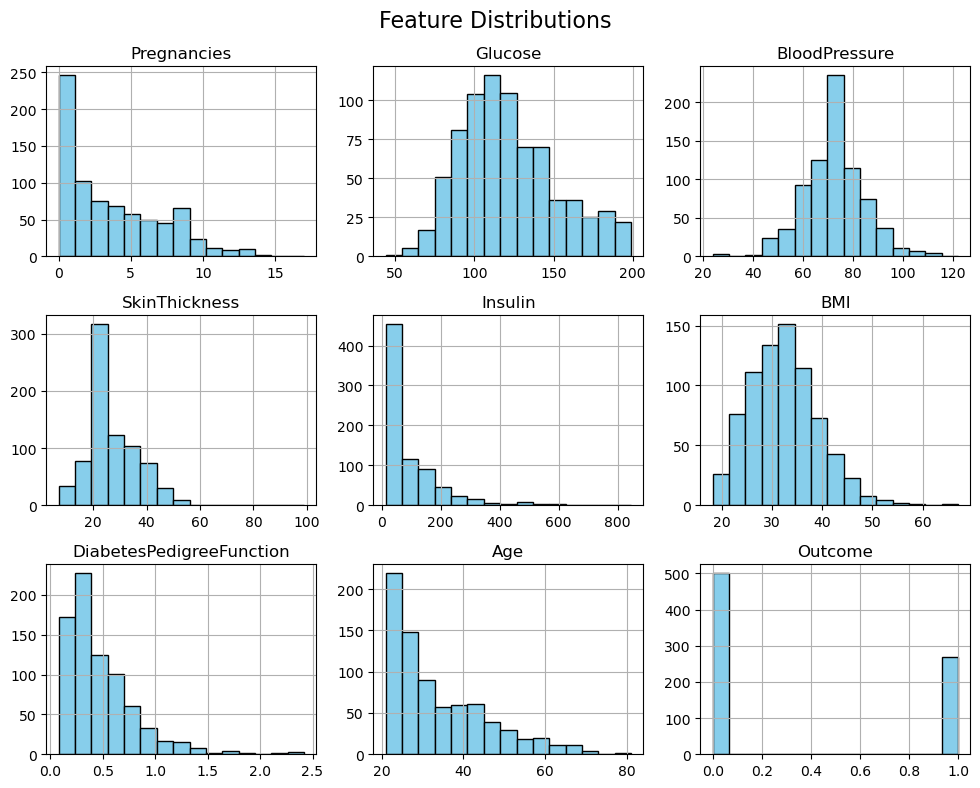

In [52]:
pima.hist(figsize=(10,8), bins=15, color="skyblue", edgecolor="black")
plt.suptitle('Feature Distributions', fontsize= 16)
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()


# Boxplot

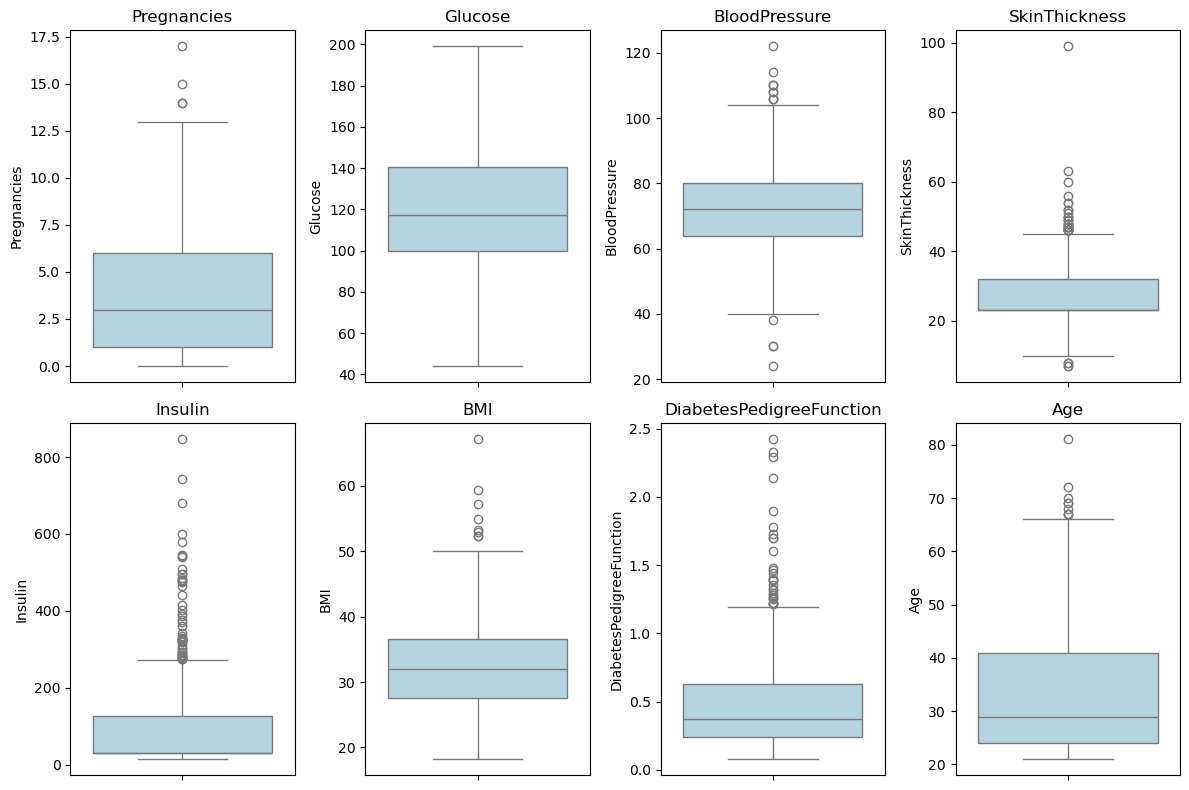

In [53]:
plt.figure(figsize=(12,8))
for i, col in enumerate(pima.drop('Outcome', axis=1).columns, 1):
                                  plt.subplot(2,4,i) # 2 rows 4 columns of plot
                                  sns.boxplot(data=pima, y=col, color='lightblue')
                                  plt.title(col)
plt.tight_layout()
plt.savefig('box_plots.png')
plt.show()

# Correlation Heatmap

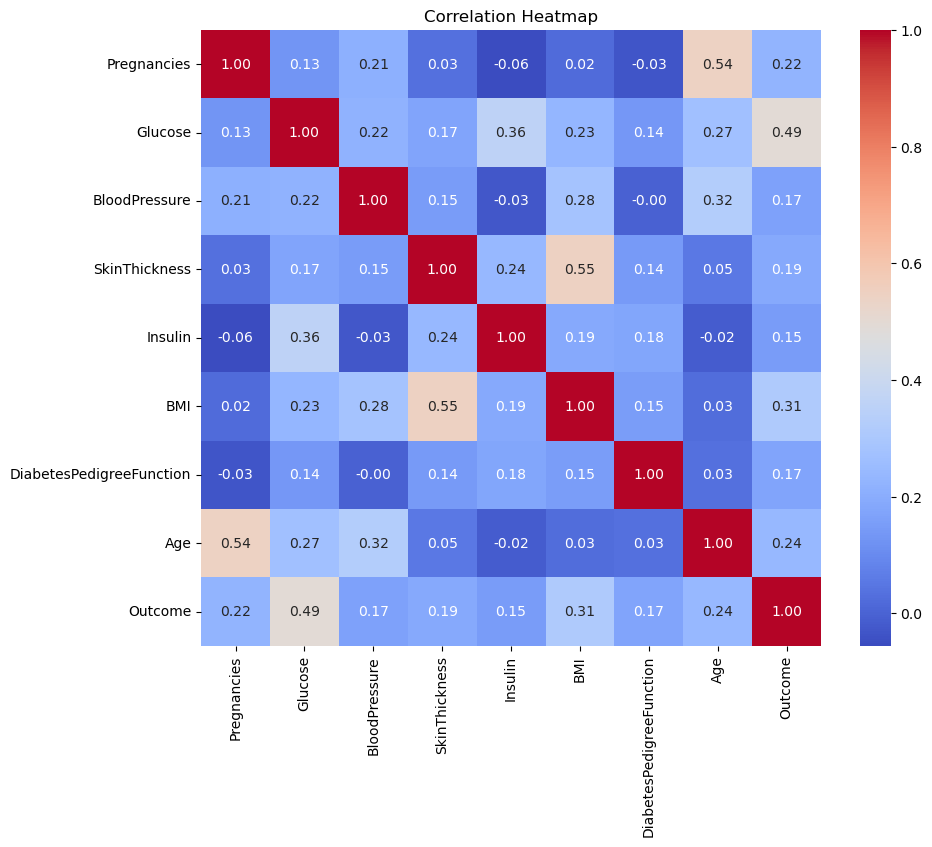

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(pima.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

# Pairplot

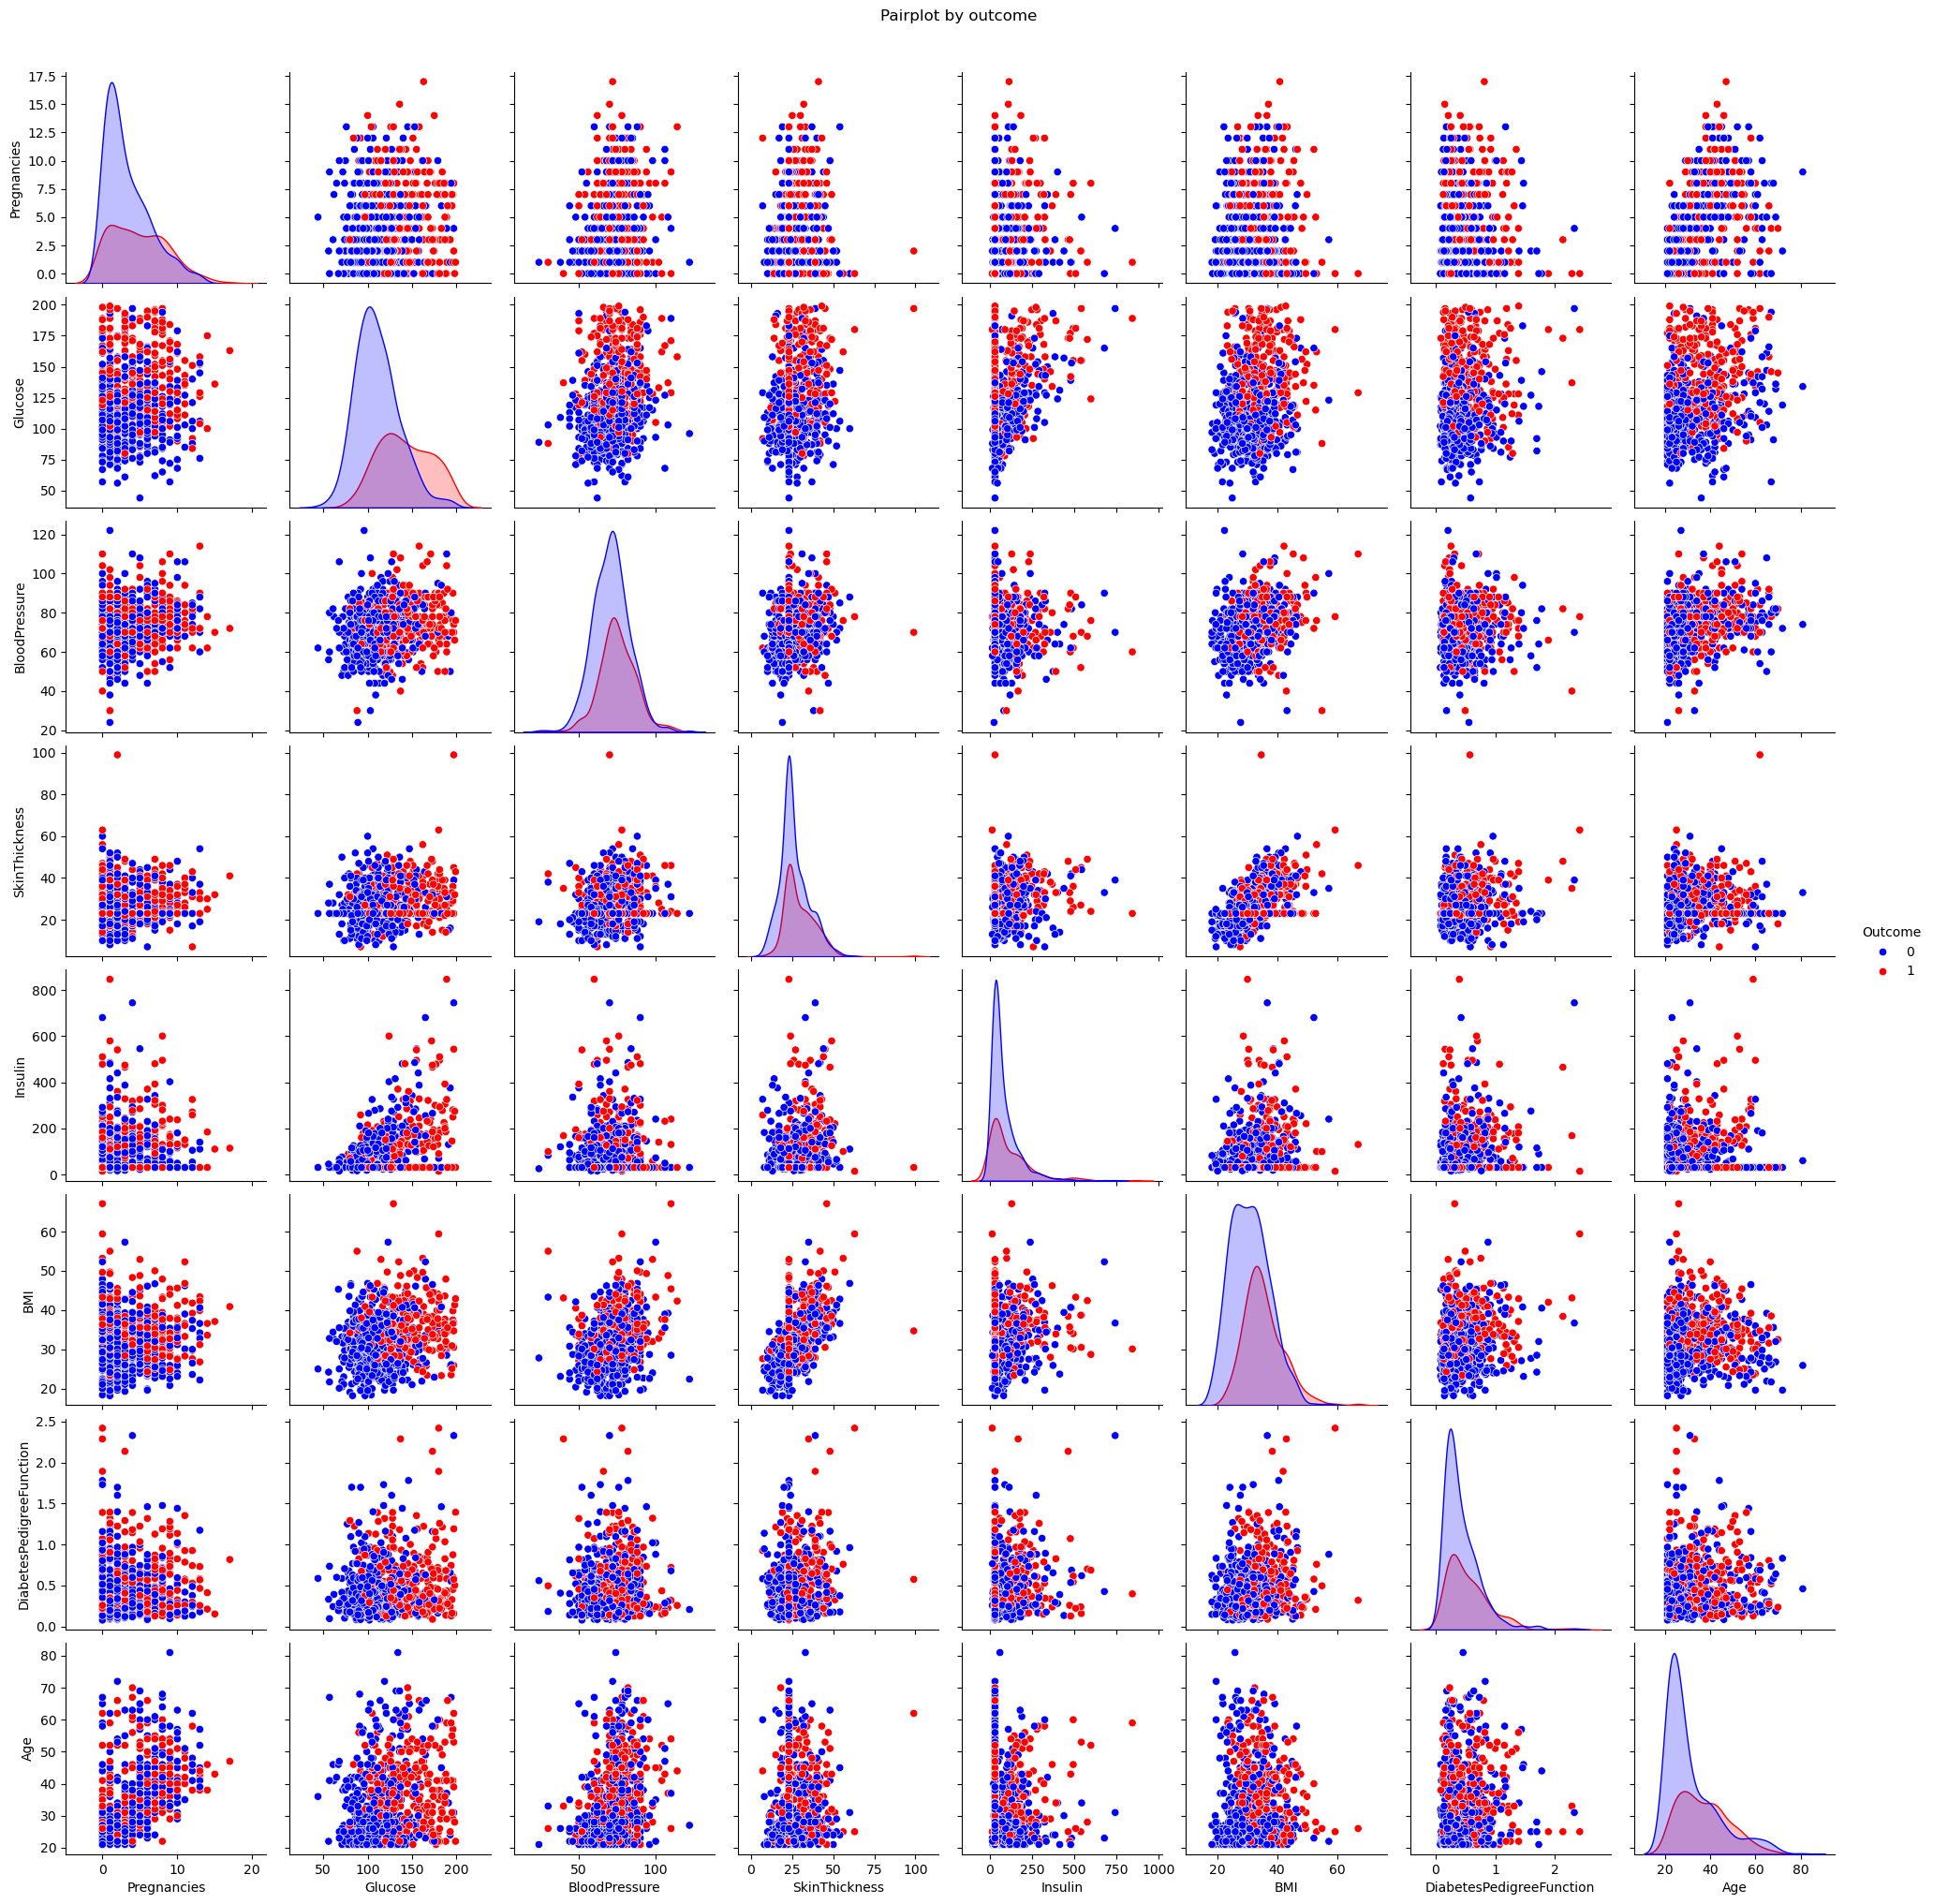

In [55]:
sns.pairplot(pima, hue='Outcome', diag_kind='kde', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot by outcome', y =1.02)
plt.savefig('pairplot.png')
plt.show()

# Train_Test_Split

In [27]:
x= pima.drop('Outcome', axis = 1)
y= pima['Outcome']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size= 0.2, random_state=42)

# Feature Scaling

In [28]:
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# K-NEAREST NEIGHBORS KNN

In [29]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn= knn.predict(x_test)

print("KNN Accuracy:" , accuracy_score(y_test, y_pred_knn))
print(confusion_matrix (y_test, y_pred_knn))
print(classification_report (y_test, y_pred_knn))

KNN Accuracy: 0.7532467532467533
[[80 19]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Logistic Regression

In [30]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("Logistic Regression Accuracy:" ,accuracy_score (y_test, y_pred_lr))
print(confusion_matrix (y_test, y_pred_lr))
print(classification_report (y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7662337662337663
[[82 17]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



# Decision Tree

In [31]:
dt= DecisionTreeClassifier(random_state= 42)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

print("Decision Tree Accuracy:" , accuracy_score(y_test, y_pred_dt))
print(confusion_matrix (y_test, y_pred_dt))
print(classification_report (y_test, y_pred_dt))

Decision Tree Accuracy: 0.7272727272727273
[[74 25]
 [17 38]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



# Random Forest

In [ ]:
rf= RandomForestClassifier(random_state= 42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest Accuracy:" , accuracy_score(y_test, y_pred_rf))
print(confusion_matrix (y_test, y_pred_rf))
print(classification_report (y_test, y_pred_rf))

Random Forest Accuracy: 0.7662337662337663
[[80 19]
 [17 38]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# Support Vector Machine (SVM)

In [41]:
svm = SVC(probability = True)
svm.fit(x_train , y_train)
y_pred_svm = svm.predict(x_test)

print("Support Vector Machine Accuracy:" , accuracy_score(y_test, y_pred_svm))
print(confusion_matrix (y_test, y_pred_svm))
print(classification_report (y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.7532467532467533
[[84 15]
 [23 32]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



# Naive Bayes

In [42]:
nb = GaussianNB()
nb.fit(x_train , y_train)
y_pred_nb = nb.predict(x_test)

print("Naive Bayes Accuracy:" , accuracy_score(y_test, y_pred_nb))
print(confusion_matrix (y_test, y_pred_nb))
print(classification_report (y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7532467532467533
[[78 21]
 [17 38]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



#XGBoost

In [43]:
xgb_model = XGBClassifier(eval_metric ='logloss')
xgb_model.fit(x_train , y_train)
y_pred_xgb = xgb_model.predict(x_test)

print("XGBoost Accuracy:" , accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix (y_test, y_pred_xgb))
print(classification_report (y_test, y_pred_xgb))

XGBoost Accuracy: 0.7207792207792207
[[75 24]
 [19 36]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        99
           1       0.60      0.65      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



# ROC CURVE PLOTTING

In [44]:
# Define models
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "SVM" : SVC(probability=True),
    "Naive Bayes" : GaussianNB(),
    "XGBoost" : XGBClassifier(eval_metric='logloss')
}

#Train models
for name, model in models.items():
    model.fit(x_train, y_train)

In [62]:
def plot_roc_curve(models,x_test,y_test, label=None):
    plt.figure(figsize=(10, 8))

    #loop through modles and plot ROC curve
    for name, model in models.items():
       
        # Get predicted probabilities for the positive class
        y_probs= model.predict_proba(x_test)[:,1] if hasattr (model,"predict_proba") else model.decision_function(x_test)
        
        #Compute ROC curve
        fpr, tpr, _= roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)
        
        #Plot ROC Curve for each model
        plt.plot(fpr,tpr, label= f'{name} (AUC= {auc_score:.2f})', alpha= 0.7)
   
    #Plot diagonal line representing random classifier
   
    #Add labels, title and legend
    plt.plot ([0, 1], [0, 1], 'k--') #diagonal line
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve comparision')
    plt.legend(fontsize=12)
    
    #Display the plot
    plt.savefig('roc_curve_comparison.png')
    plt.show()

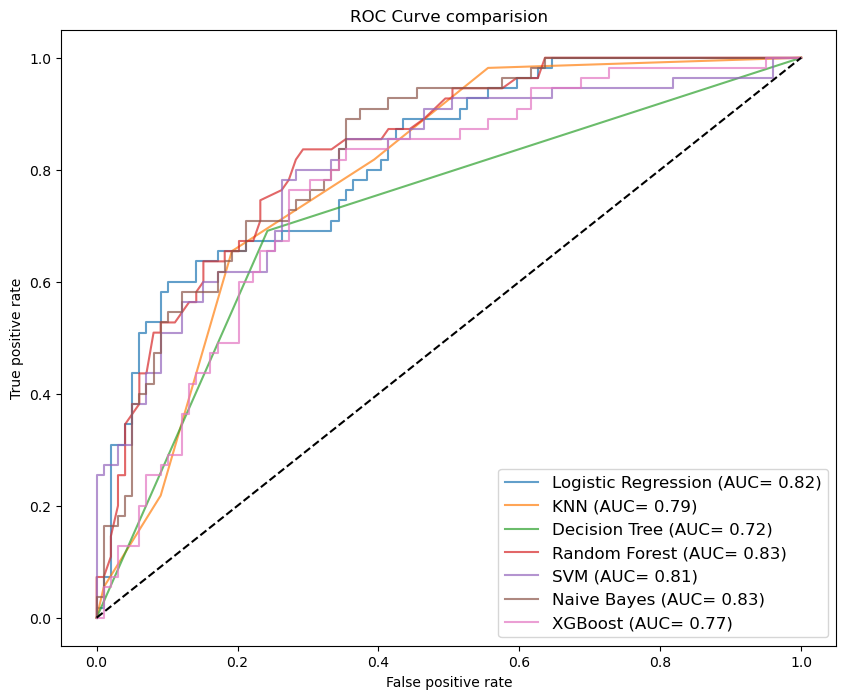

In [64]:
plot_roc_curve(models,x_test,y_test)

# ROC Curve comparision 
The ROC curves above compare the classification performance of all models. 
Naive Bayes achieved the highest AUC score (0.83), 
followed by Random Forest (0.82), and 
Logistic Regression/SVM (0.81). Decision Tree performed the weakest with an AUC of 0.72.